## Lab 2 – Computational Methods

## Part 2: Planetary orbits

The gravitational force felt by an object (planet, satellite, star, etc.) of mass $m_1$ at position $\mathbf{r}_1$  due to another of mass $m_2$ at $\mathbf{r}_2$ is given by

$$\mathbf{F} = - \frac{G m_1 m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} (\mathbf{r}_1-\mathbf{r}_2)$$

The equations of motion for the first object can then be written:

$$ \frac{\mathrm{d}^2 x_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} (x_1-x_2) $$
$$ \frac{\mathrm{d}^2 y_1}{\mathrm{d} t^2} = - \frac{G m_2}{|\mathbf{r_1} - \mathbf{r_2}|^3} (y_1-y_2) $$

In what follows, we will express time in years, distances in AU (astronomical unit $\sim$ Earth-Sun distance), masses in terms of the solar mass ($M_\odot$) and use $G \approx 4 \pi^2$ to simplify calculations.

Revisit the slides and Python script from Lecture 4 (Scipy2.py and Scipy slides 2) -- here we examined how a 2nd order differential equation (the harmonic oscillator) could be solved using scipy.integration.solve_ivp by splitting it into two coupled first order equations. Use this as a basis to solve the differential equations above.

Note that gravitational forces are always proportional to the mass $m$ upon which they act. It is therefore more convenient to work with the velocity $\mathbf{v} = \dot{\mathbf{r}}$ instead of the momentum $\mathbf{p} = m\mathbf{v}$, so that redundant factors of $m$ cancel from the equations of motion.

### Exercise 1
For the first case, we look at the case of the earth and the sun. We choose coordinates so that all motion takes place within the $x-y$ plane ($z=0$).

Take $m_1 = 3\times10^{-6}$ and $m_2 =1.0$.

Further assume that the sun remains fixed at the origin -- i.e. $\mathbf{r_2}(t) = \mathbf{0}$.

Use initial conditions $\mathbf{r}_1(t=0) = (1,0)$ and $\mathbf{v}_1(t=0) = (0, 2\pi)$.


a) Write the system of 4 coupled differential equations describing the system.

b) Write a function evaluating each of the first derivative terms, and which can be passed to solve_ivp to integrate this system of ODEs.

c) Calculate the orbit trajectory by integrating the system of ODEs over a suitable sample of time points.

d) Plot and compare a few orbit with different initial velocities



_answer to a)_

$$ \frac{\mathrm{d} x_1}{\mathrm{d} t} (t)= v_{x1} $$

$$ \frac{\mathrm{d} y_1}{\mathrm{d} t} (t) = v_{y1} $$

$$ \frac{\mathrm{d} v_{x1}}{\mathrm{d} t} (t) = -\frac{G m_2 x_1}{(x_1^2 + y_1^2)^{3/2}}  $$

$$ \frac{\mathrm{d} v_{y1}}{\mathrm{d} t} (t) = -\frac{G m_2 y_1}{(x_1^2 + y_1^2)^{3/2}} $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# y contains (x1, y1, px1, py1)
def dydt(t, y, m2):
    # Define an output array with same dimensions as y
    output = np.zeros_like(y)
    # Define derivatives
    output[0] = y[2]
    output[1] = y[3]
    output[2] = -4*np.pi**2*m2*y[0]/(y[0]**2+y[1]**2)**(3/2)
    output[3] = -4*np.pi**2*m2*y[1]/(y[0]**2+y[1]**2)**(3/2)
        
    return output                

In [4]:
#initial conditions
y0 = np.array([1.0,0.0,0*2*np.pi,2*np.pi])
m1, m2 = 3E-6, 1.0

#range of times
t_min, t_max = 0.0, 50.0
t = np.linspace(t_min, t_max, 5000)

# Run ODE solver for earth-like initial conditions. Set tolerances to be small enough to avoid numerical errors
earthdata = solve_ivp(lambda t,y: dydt(t, y, m2), (t_min, t_max), y0, rtol=1E-10, atol=1E-10)   

In [5]:
#other possible starting values of vx
otherstarting = [1.0, 2.5, 3.0]
otherdata = []          #create an empty list

#generate data for the other cases also
for const in otherstarting:
    y0a = np.array([1, 0, 0*np.pi, const*np.pi]) 
    temp = solve_ivp(lambda t,y: dydt(t, y, m2), (t_min, t_max), y0a, rtol=1E-10, atol=1E-10)
    otherdata.append(temp)

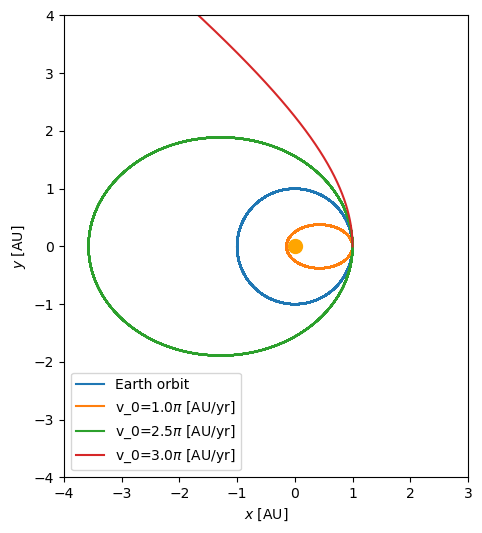

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.plot(0, 0, 'o', ms=10, color='orange')
ax.plot(earthdata.y[0], earthdata.y[1], label="Earth orbit")

for i, const in enumerate(otherstarting):
    ax.plot(otherdata[i].y[0], otherdata[i].y[1] , label='v_0='+str(const)+r'$\pi$ [AU/yr]')
ax.set_xlim([-4.0,3.0])
ax.set_ylim([-4.0,4.0])
ax.set_xlabel('$x$ [AU]')
ax.set_ylabel('$y$ [AU]')
ax.legend()
plt.show()

## Homework assignment

### Q1. 
Generalise the function above to allow for an arbitrary number of objects, without any assumptions about their relative masses.   
Assume the objects are all in-plane -- only x and y components vary.

To produce nice orbital plots for the systems below, work in the centre-of-mass frame.   
_i.e. correct the initial positions and velocities so that the centre-of-mass remains at the origin_

Create a function to do this for any set of initial positions and velocities.

In [7]:
# Integrates ODE for any number of objects

# Hint use num = number of objects
# Organise y as a 4*num element array arranged (x1, x2, ... y1, y2, .... vx1, vx2,....., vy1, vy2,....)
# organise output similarly
# mass is now a vector with num elements

def dydt_gen(t, y, mass, num):

    output = np.zeros_like(y)

    for i in range(num):
        output[i] = y[2*num+i]
        output[num+i] = y[3*num+i]
        output[2*num+i] = -4*np.pi**2*np.sum([(mass[j])*(y[i]-y[j])/((y[i]-y[j])**2+(y[num+i]-y[num+j])**2)**(3/2) for j in range(num) if j!=i])
        output[3*num+i] = -4*np.pi**2*np.sum([(mass[j])*(y[num+i]-y[num+j])/((y[i]-y[j])**2+(y[num+i]-y[num+j])**2)**(3/2) for j in range(num) if j!=i])

    return output

# Corrects initial conditions so that centre-of-mass is fixed and at the origin
def correct_for_cm(x0s, y0s, vx0, vy0, mass):
    
    num = len(x0s)
    x0s = np.array(x0s)
    y0s = np.array(y0s)
    vx0 = np.array(vx0)
    vy0 = np.array(vy0)
    mass = np.array(mass)
    
    M_tot = np.sum(mass)
    
    cmx = np.sum([mass[i]*x0s[i] for i in range(num)])/M_tot
    cmy = np.sum([mass[i]*y0s[i] for i in range(num)])/M_tot
    cm_vx = np.sum([mass[i]*vx0[i] for i in range(num)])/M_tot
    cm_vy = np.sum([mass[i]*vy0[i] for i in range(num)])/M_tot

    x0s = x0s - cmx
    y0s = y0s - cmy
    vx0 = vx0 - cm_vx
    vy0 = vy0 - cm_vy
    
    return x0s, y0s, vx0, vy0

### Q2. 
Consider a three-body system consisting of the Sun, Earth and Mars. 

You can assume that Mars has mass $3.2\times10^{-7} M_\odot$ and a circular orbit with a radius of $1.53$ AU. A circular orbit of radius $r$ around the sun implies an orbital speed of
$$ |\mathbf{v}| = \sqrt{\frac{GM_{\odot}}{r}}.$$  
You can also assume that Earth and Mars are aligned along the positive x-axis at $t=0$.

Plot the following over a suitable time range:   
- the trajectories of all three bodies in the centre of mass frame.     
- the trajectory of the sun only, and explain the observed behaviour *(you may either write a comment in your Python code or write in a separate markdown cell)*.   
- the separation between Earth and Mars as a function of time.

In [8]:
# Initial conditions for Q2: Sun, Earth, Mars

num = 3
mass = [1.0, 3*10**-6, 3.2*10**-7]
x0s = [0, 1.0, 1.53]
y0s = [0, 0, 0]
vx0 = [0, 0, 0]
vy0 = [0, -2*np.pi, np.sqrt(4*np.pi**2/1.53)]

x0c, y0c, vx0c, vy0c = correct_for_cm(x0s, y0s, vx0, vy0, mass)
input0 = np.concatenate((x0c, y0c, vx0c, vy0c))

t = np.linspace(0, 20, 1000)
three_body = solve_ivp(lambda t, y: dydt_gen(t, y, mass, num), (t[0], t[-1]), input0, rtol=1E-10, atol=1E-10)

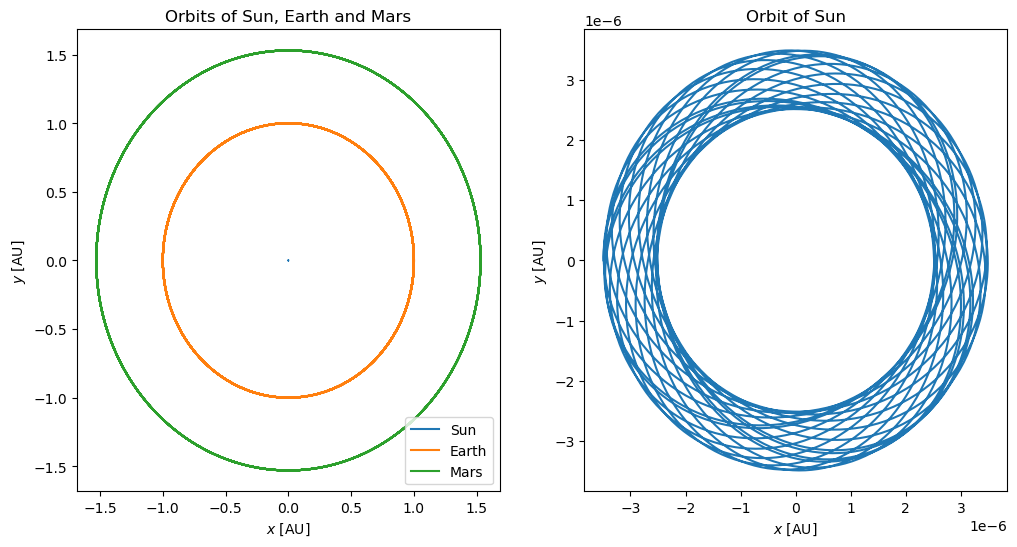

In [9]:
names = ['Sun', 'Earth', 'Mars']

fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].set_title('Orbits of Sun, Earth and Mars')
# ax.set_aspect('equal')
for i in range(num):
    ax[0].plot(three_body.y[i], three_body.y[num+i], label=names[i])
# ax.plot(three_body.y[0], three_body.y[num], label='Orbit of Sun')

ax[0].set_xlabel('$x$ [AU]')
ax[0].set_ylabel('$y$ [AU]')
ax[0].legend()

ax[1].set_title('Orbit of Sun')
ax[1].plot(three_body.y[0], three_body.y[num])
ax[1].set_xlabel('$x$ [AU]')
ax[1].set_ylabel('$y$ [AU]')
# ax[1].set_title('Orbit of Earth')
# ax[1].plot(three_body.y[1], three_body.y[num+1])
# ax[1].set_xlabel('$x$ [AU]')
# ax[1].set_ylabel('$y$ [AU]')
# ax[1].set_xlim([0.9,1.1])
# ax[1].set_ylim([-0.1,0.1])

plt.show()
plt.close()

Explanation of Sun's orbit: Sun orbits around the barycentre of the system, at $(0,0)$. The orbits trace out an annulus. This is the Sun's irrational orbit, that is to say, the sun's orbit is such that it never returns to the same point with the same velocity, after one full rotation by $2\pi$, the sun is at a slightly different distance. Therefore, given infinite time, it traces out all positions in the annulus between the circle of radius of the length of each orbit on the semi-minor axis and the circle of radius of the length of each orbit along the semi-major axis.

### Q3.
_Horseshoe orbits_ can occur when a smaller body (such as an asteroid) and a large object (such as Earth) are in similar orbits around a star.  
The asteroid's trajectory around the sun is affected by the gravitational pull of Earth when the two bodies are nearest in their orbits.  
If the asteroid is on a lower, faster orbit than Earth, then the resulting force towards Earth shifts the asteroid to a higher, slower orbit, and vice versa.  
A horseshoe orbit occurs when this shifts the asteroid from a lower to a higher orbit than Earth, so that it goes through a cycle of catching up and then falling behind the Earth.  
The change in the shape of the asteroid's orbit are very small, but result in a horseshoe shape when mapped relative to both the Sun and Earth.  

To model this:   
- replace Mars with a body MUCH less massive than Earth, with an initial position directly opposite Earth.  
- choose initial conditions so that this object is on a circular orbit with the same angular direction as Earth, but with a slightly smaller or greater radius.  
- plot trajectories in a reference frame which rotates _with_ Earth so that a horseshoe-shaped orbit is clear

_Hint: Correct for the centre-of-mass as before, and then transform the coordinates so that the angle from the Sun to Earth is fixed.    
You can do this by finding the position of Earth in polar coordinates ($r, \theta$) at each time step, and then rotating by $-\theta$ using:_

$$x_{\rm new} = x_{\rm old}  \cos(-\theta) - y_{\rm old}  \sin (-\theta)$$
$$y_{\rm new} = x_{\rm old}  \sin(-\theta) +y_{\rm old}  \cos (-\theta)$$

In [54]:
# Initial conditions for Q3: Sun, Earth, Asteroid

names2 = ['Sun', 'Earth', 'Asteroid']
num2 = 3
mass2 = [1.0, 3*10**-6, 1e-35]
x0sn = [0, 1.0, -1.01]
y0sn = [0, 0, 0]
vx0n = [0, 0, 0]
vy0n = [0, -2*np.pi, 2*np.pi/np.sqrt(-x0sn[2])]

x0cn, y0cn, vx0cn, vy0cn = correct_for_cm(x0sn, y0sn, vx0n, vy0n, mass2)
input1 = np.concatenate((x0cn, y0cn, vx0cn, vy0cn))

t2 = np.linspace(0, 500, 1000)
horseshoe = solve_ivp(lambda t, y: dydt_gen(t, y, mass2, num2), (t2[0], t2[-1]), input1, rtol=1E-10, atol=1E-10)



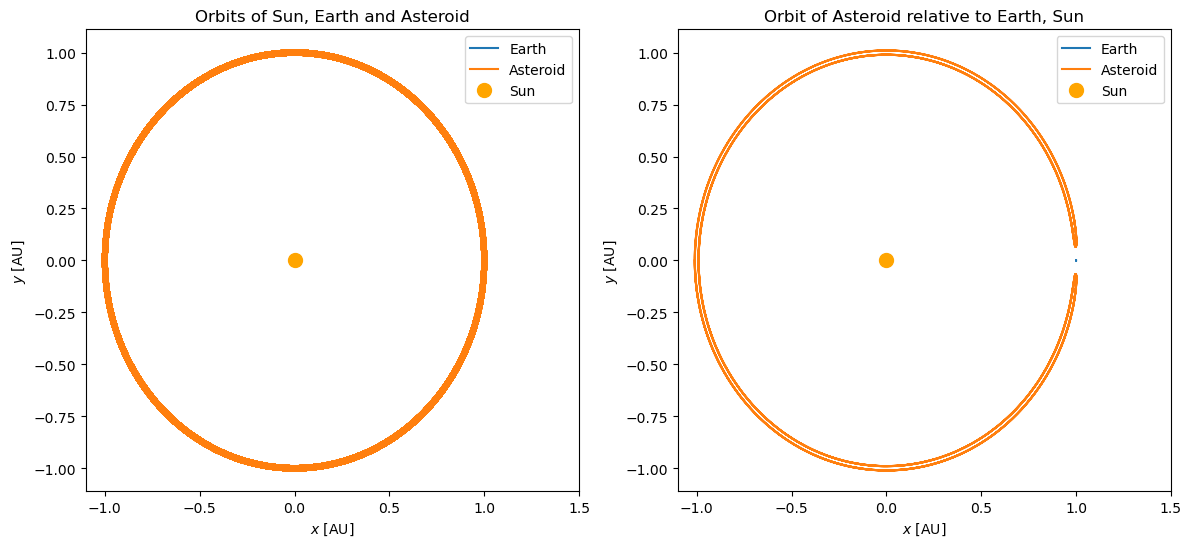

In [71]:
thetas = np.arctan2(horseshoe.y[num+1], horseshoe.y[1])  # Get angle theta for Earth position at each timestep
x1, y1 = horseshoe.y[1]*np.cos(-thetas)-horseshoe.y[num+1]*np.sin(-thetas), horseshoe.y[1]*np.sin(-thetas)+horseshoe.y[num+1]*np.cos(-thetas)  # Rotate Earth position by -theta
x2, y2 = horseshoe.y[2]*np.cos(-thetas)-horseshoe.y[num+2]*np.sin(-thetas), horseshoe.y[2]*np.sin(-thetas)+horseshoe.y[num+2]*np.cos(-thetas)  # Rotate Asteroid position by -theta

fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].set_title('Orbits of Sun, Earth and Asteroid')
for i in (1,2):
    ax[0].plot(horseshoe.y[i], horseshoe.y[num2+i], label=names2[i])
ax[0].set_xlabel('$x$ [AU]')
ax[0].set_ylabel('$y$ [AU]')
ax[0].plot(0, 0, 'o', ms=10, color='orange', label='Sun')
ax[0].set_xlim([-1.1, 1.5])
ax[0].legend()

ax[1].set_title('Orbit of Asteroid relative to Earth, Sun')
ax[1].plot(x1, y1, label='Earth')
ax[1].plot(x2, y2, label='Asteroid')
ax[1].set_xlabel('$x$ [AU]')
ax[1].set_ylabel('$y$ [AU]')
ax[1].plot(0, 0, 'o', ms=10, color='orange', label='Sun')
ax[1].set_xlim([-1.1, 1.5])
ax[1].legend()

plt.show()
plt.close()